# Importar librerías y cargar el dataset
Empecemos importando las librerías necesarias y cargando el dataset "iris".

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Cargamos el dataset "iris"
iris = load_iris()

# Crear un dataframe
El dataset "iris" viene en forma de diccionario. Para hacer el análisis más fácil, crearemos un dataframe de pandas a partir de los datos.

In [ ]:
# Creamos un dataframe de pandas con los datos de iris
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Renombramos los valores de la columna "target" por los nombres de las especies
df['target'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Análisis univariado
Empecemos analizando una sola variable a la vez. Para ello, podemos utilizar histogramas o gráficos de cajas y bigotes.

## Histogramas
Los histogramas son una forma de representar la distribución de una variable. Nos permiten ver cómo se distribuyen los datos y si tienen alguna tendencia.

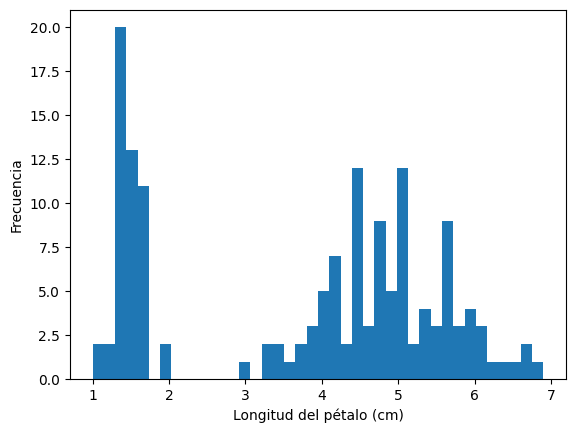

In [ ]:
# Histograma de la longitud del pétalo
plt.hist(df['petal length (cm)'], bins=40)
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Frecuencia')
plt.show()

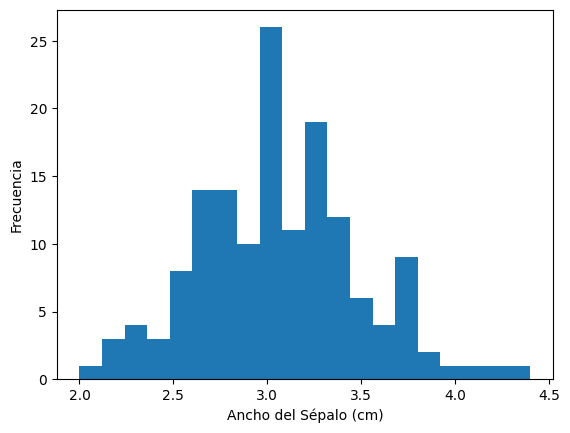

In [ ]:
plt.hist(df['sepal width (cm)'], bins=20)
plt.xlabel('Ancho del Sépalo (cm)')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver que la longitud del pétalo se distribuye aproximadamente de forma normal, con la mayoría de los valores entre 1 y 2 cm.

# Gráficos de cajas y bigotes
Los gráficos de cajas y bigotes también nos permiten ver la distribución de una variable, pero de una forma más visual. Nos muestran la mediana, los cuartiles y los valores atípicos.

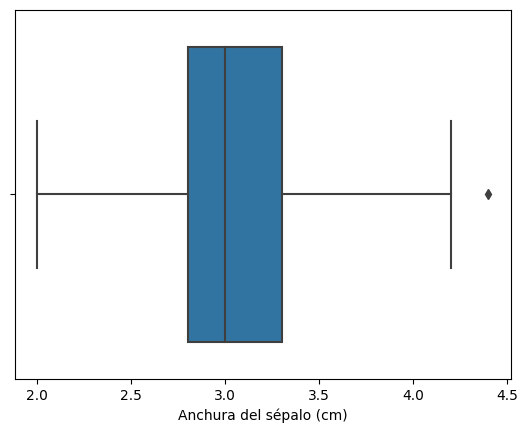

In [ ]:
# Gráfico de cajas y bigotes de la anchura del sépalo
sns.boxplot(x=df['sepal width (cm)'], whis=2)
plt.xlabel('Anchura del sépalo (cm)')
plt.show()


Podemos ver que la anchura del sépalo tiene una mediana de aproximadamente 3 cm y que hay algunos valores atípicos.

# Análisis bivariado
Ahora, analizaremos dos variables a la vez. Para ello, podemos utilizar gráficos de dispersión o mapas de calor.

## Gráficos de dispersión
Los gráficos de dispersión nos permiten ver la relación entre dos variables. Podemos ver si hay alguna correlación entre ellas y si hay algún patrón.

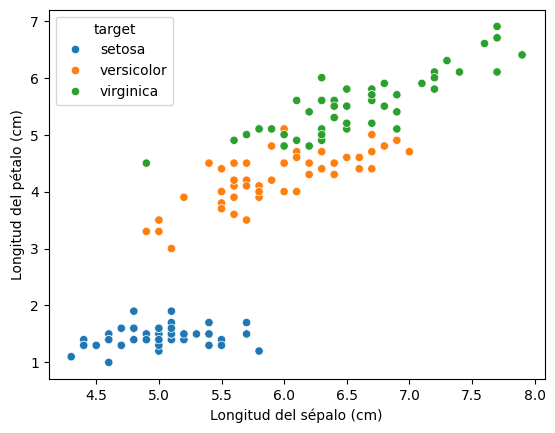

In [ ]:
# Gráfico de dispersión de la longitud del sépalo y la anchura del sépalo
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=df, hue='target')#, style='target', sizes='petal width (cm)')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.show()

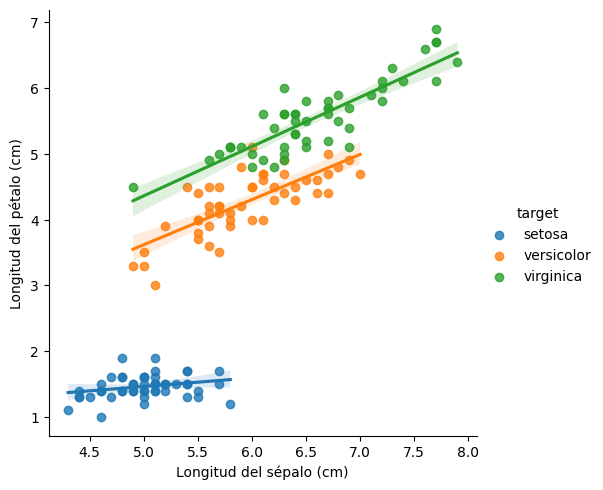

In [ ]:
# Gráfico de dispersión de la longitud del sépalo y la anchura del sépalo
sns.lmplot(x='sepal length (cm)', y='petal length (cm)', data=df, hue='target')#, style='target', sizes='petal length (cm)')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.show()

In [ ]:
df['sepal'] = df['sepal length (cm)']/df['sepal width (cm)']

In [ ]:
df['petal'] = df['petal length (cm)']/df['petal width (cm)']

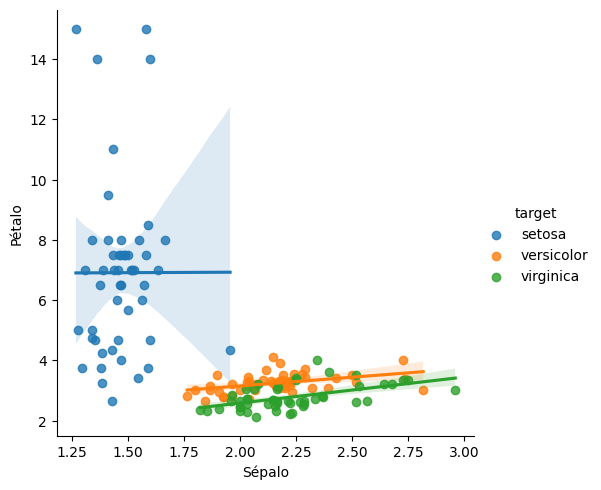

In [ ]:
# Gráfico de dispersión de la longitud del sépalo y la anchura del sépalo
sns.lmplot(x='sepal', y='petal', data=df, hue='target')#, style='target', sizes='petal length (cm)')
plt.xlabel('Sépalo')
plt.ylabel('Pétalo')
plt.show()

Podemos ver que hay una correlación negativa entre la longitud y la anchura del sépalo, es decir, mientras mayor sea la longitud, menor será la anchura. Además, podemos ver que las especies de flores se agrupan de forma diferente según la longitud y anchura del sépalo.

## Mapas de calor
Los mapas de calor nos permiten ver la correlación entre dos variables de forma más clara. Nos muestran los valores de correlación en una escala de colores.

<ipython-input-26-f32a2dcfac89>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


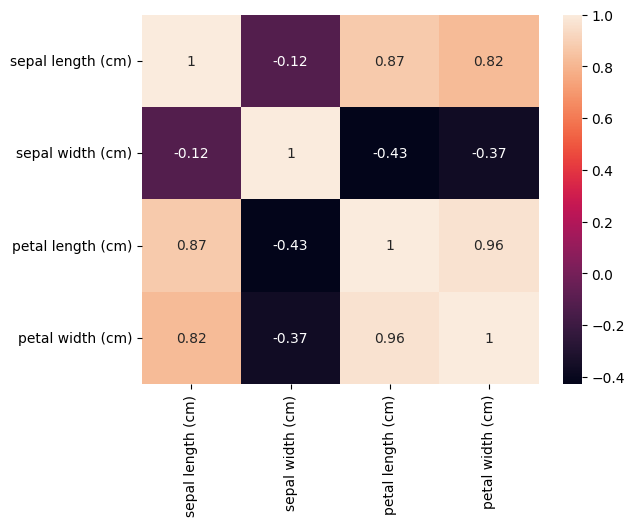

In [ ]:
# Mapa de calor de la matriz de correlación de todas las variables
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

Podemos ver que la longitud y anchura del sépalo están correlacionadas negativamente, mientras que la longitud y anchura del pétalo están altamente correlacionadas positivamente. Además, podemos ver que la longitud del pétalo está altamente correlacionada con la especie de la flor.

## Box plot
Un box plot es un gráfico que muestra la distribución de los datos a lo largo de un eje. Es útil para comparar las distribuciones de los datos en distintas categorías.

<Axes: xlabel='target', ylabel='petal length (cm)'>

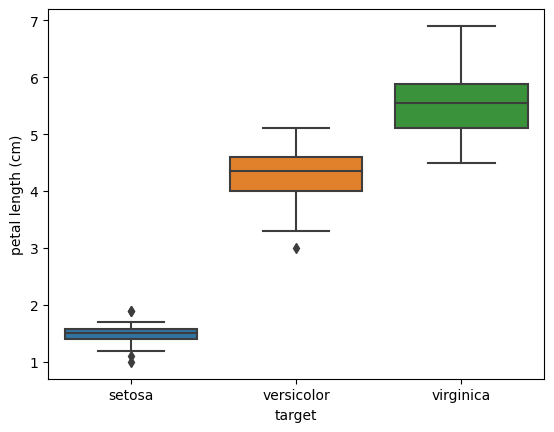

In [ ]:
sns.boxplot(x='target', y='petal length (cm)', data=df)

Este código genera un box plot que muestra la distribución de la longitud del pétalo de las flores, separado por especie.



## Violin plot
Un violin plot es similar a un box plot, pero muestra la densidad de los datos en lugar de la distribución.

<Axes: xlabel='target', ylabel='petal length (cm)'>

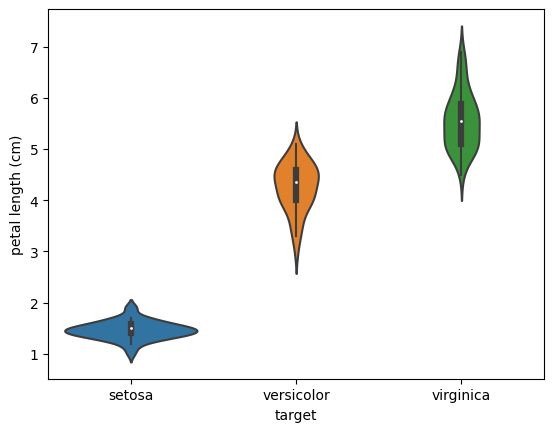

In [ ]:
sns.violinplot(x='target', y='petal length (cm)', data=df)


Este código genera un heatmap que muestra la correlación entre las variables en el dataset iris.

## Bar plot
Un bar plot es un gráfico que muestra la relación entre una variable categórica y una variable numérica. Es útil para comparar los valores de una variable numérica en distintas categorías.

<Axes: xlabel='target', ylabel='sepal length (cm)'>

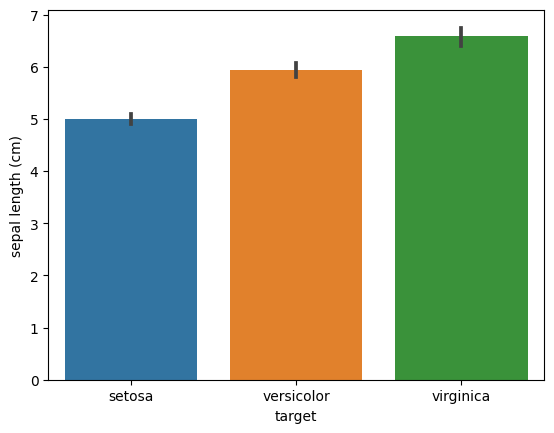

In [ ]:
sns.barplot(x='target', y='sepal length (cm)', data=df)

## Strip plot
Un strip plot es similar a un scatter plot, pero muestra puntos individuales en lugar de puntos superpuestos. Este tipo de gráfico es útil para comparar la distribución de los valores de una variable numérica en distintas categorías.

<Axes: xlabel='target', ylabel='petal width (cm)'>

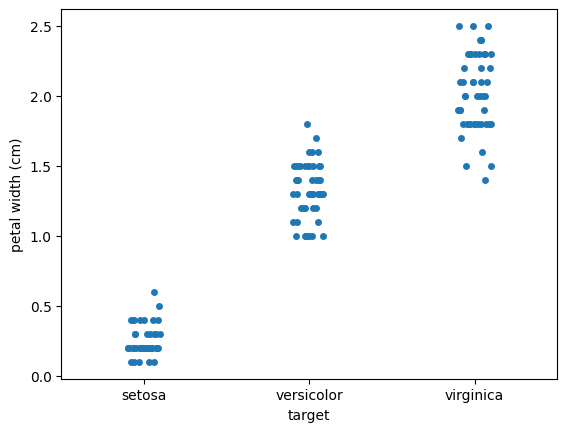

In [ ]:
sns.stripplot(x='target', y='petal width (cm)', data=df)

Este código genera un strip plot que muestra la distribución del ancho del pétalo de las flores, separado por especie.

## Joint plot
Un joint plot muestra la relación entre dos variables y la distribución de cada variable por separado. Es útil para ver cómo se relacionan dos variables y cómo se distribuyen individualmente.

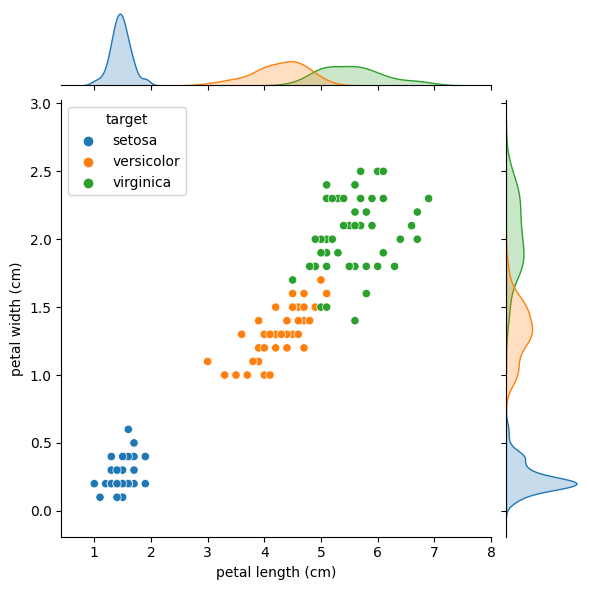

In [ ]:
sns.jointplot(x='petal length (cm)', y='petal width (cm)', data=df, hue='target')

Este código genera un joint plot que muestra la relación entre la longitud y el ancho del pétalo de las flores.

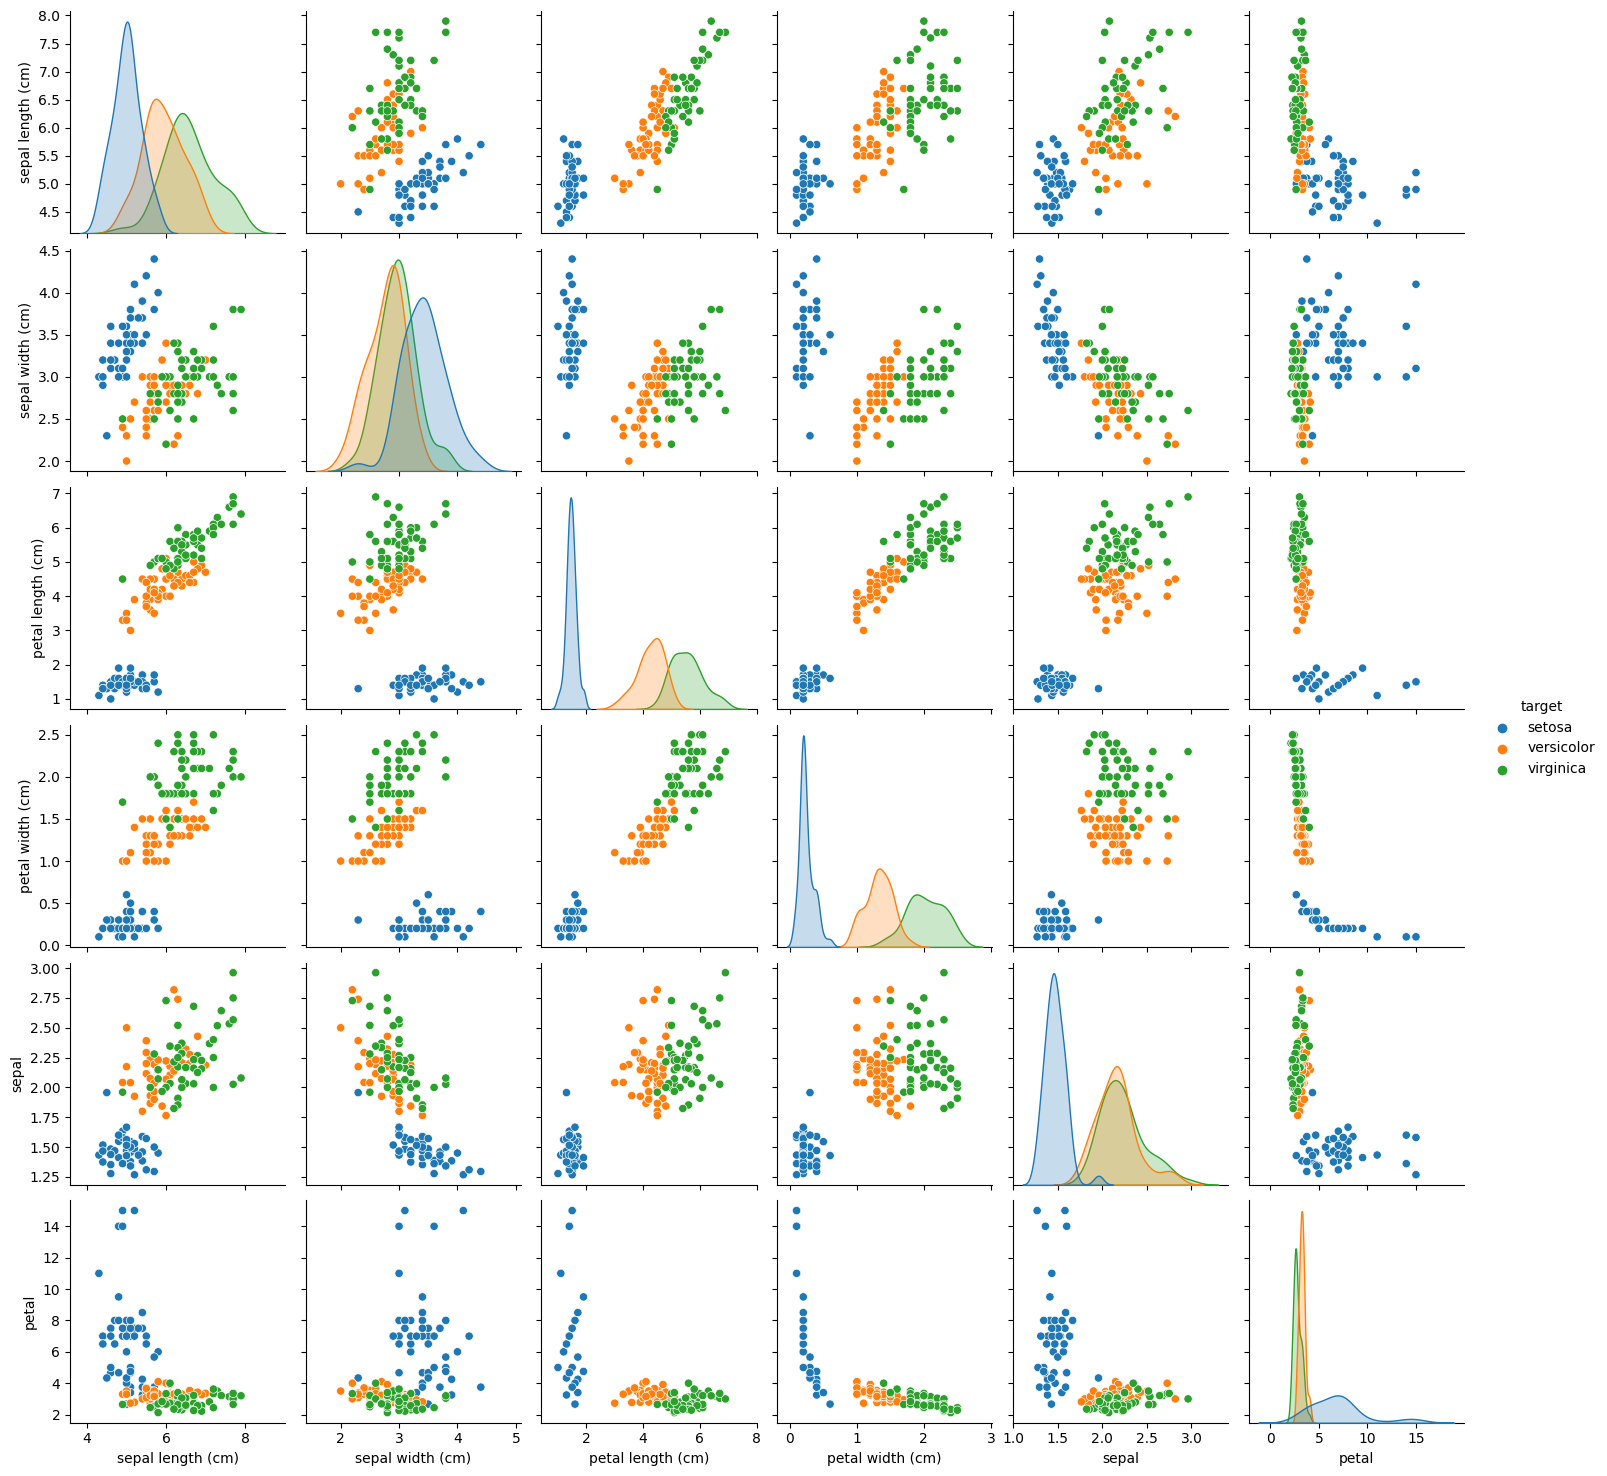

In [ ]:
sns.pairplot(df, hue='target')

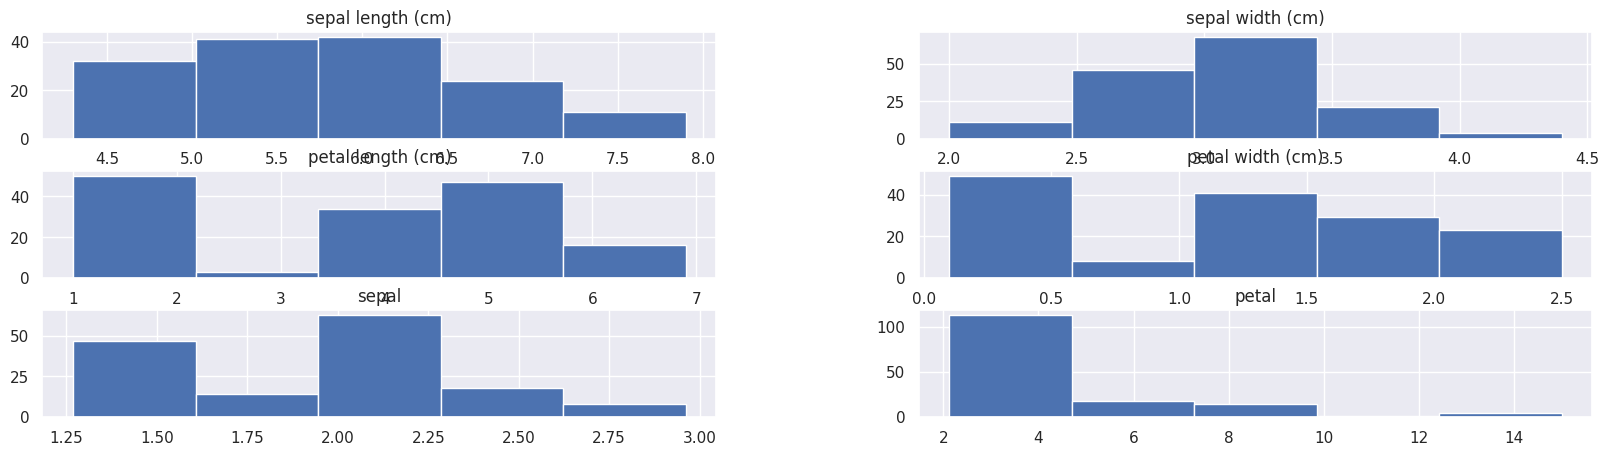

In [ ]:
sns.set()
df.hist(bins = 5, figsize=(20, 5))
plt.show()

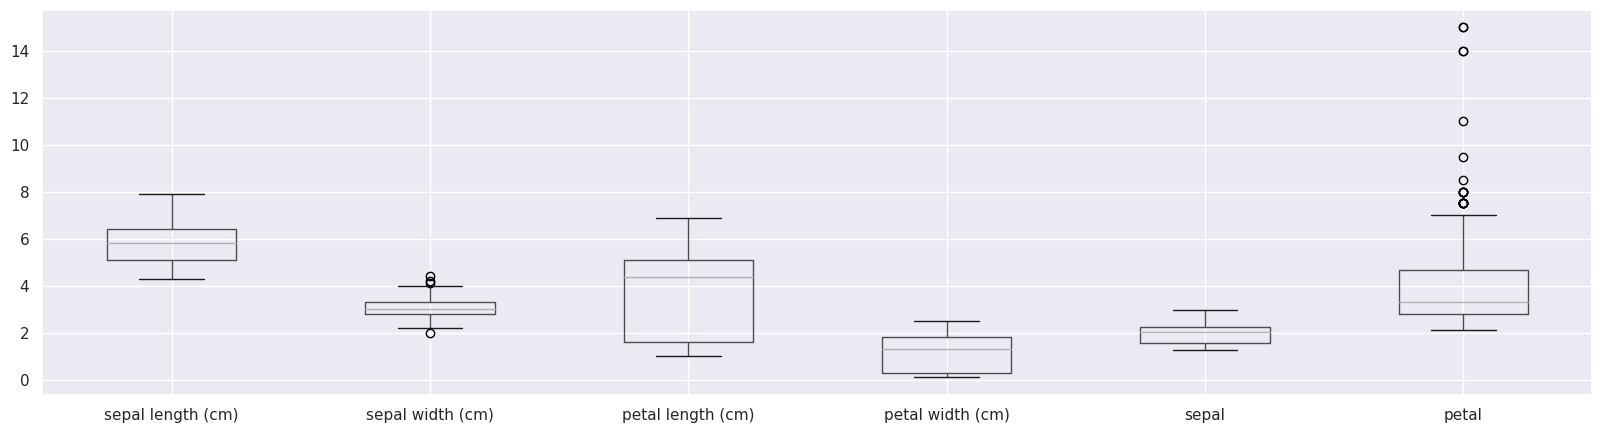

In [ ]:
sns.set()
df.boxplot(figsize=(20, 5))
plt.show()

In [ ]:
plt.figure(figsize=(15, 6))
corr = df2.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')

NameError: ignored

<Figure size 1500x600 with 0 Axes>

In [ ]:
bins_rounded = pd.IntervalIndex([pd.Interval(left=round(interval.left, 2),
                                              right=round(interval.right, 2),
                                              closed=interval.closed)
                                 for interval in bins])